In [1]:
# Libraries import
import pandas as pd
import numpy as np
from tabulate import tabulate
df1 = pd.read_csv('/content/athlete_events.csv') #read csv files and store in pandas dataframe
# df1.info()

print("Total number of records: ", len(df1))
print("Duplicate records in the dataset: ",len(df1)-len(df1.drop_duplicates(keep="first")))

Total number of records:  271116
Duplicate records in the dataset:  1385


In [2]:
df1.nunique() #Number of unique values in columns

ID        135571
Name      134732
Sex            2
Age           74
Height        96
Weight       220
Team        1184
NOC          230
Games         52
Year          36
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

52

In [3]:
df1.isnull().sum() #Number of nulls in each column

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231270
dtype: int64

In [ ]:
print('Number of duplicate records:', len(df1)-len(df1.drop_duplicates(keep="first")))
df = df1.drop_duplicates(keep="first")
df.reset_index(inplace = True, drop = True)
df

Number of duplicate records: 1385


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
269727,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
269728,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
269729,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
# Check if the missing values in age, height and weight cols for same athelete
nonnull_values = df[~df['Age'].isna()]
nonnull_values[nonnull_values['ID'].isin(list(df['ID'][df['Age'].isna()].unique()))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [ ]:
# Check if the missing values in Height cols for same athelete
nonnull_values = df[~df['Height'].isna()]
nonnull_values[nonnull_values['ID'].isin(list(df['ID'][df['Height'].isna()].unique()))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [ ]:
# Check if the missing values in Weight cols for same athelete
nonnull_values = df[~df['Weight'].isna()]
nonnull_values[nonnull_values['ID'].isin(list(df['ID'][df['Weight'].isna()].unique()))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [ ]:
# Athlete Height Data Issue
athlete_height = df.drop_duplicates(keep='first').dropna(subset=['Height'])
athlete_height['Height_in_Feet'] = (athlete_height['Height']*0.0328084).round(1) #Convert height in cm to feet
tallest_ath_ID = athlete_height.sort_values('Height_in_Feet',ascending=False).head(1)
athlete_height[athlete_height['ID']==tallest_ath_ID['ID'].values[0]]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_in_Feet
173,73,Luc Abalo,M,23.0,281.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,9.2
174,73,Luc Abalo,M,27.0,281.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,9.2
175,73,Luc Abalo,M,31.0,281.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,9.2


In [ ]:
# Athlege Age issue
import matplotlib.pyplot as plt
age_counts = df[['ID','Age']].drop_duplicates(keep='first').dropna(subset=['Age'])
age_counts = df.groupby('Age')['ID'].nunique()

age_counts_less_than_16 = age_counts[age_counts.index < 16]
print('Athletes less than 16 years')
print(tabulate(pd.DataFrame({'Age': age_counts_less_than_16.index, 'Athletes': age_counts_less_than_16.values}), headers='keys', tablefmt='pretty'))



Athletes less than 16 years
+---+------+----------+
|   | Age  | Athletes |
+---+------+----------+
| 0 | 10.0 |   1.0    |
| 1 | 11.0 |   10.0   |
| 2 | 12.0 |   27.0   |
| 3 | 13.0 |  100.0   |
| 4 | 14.0 |  341.0   |
| 5 | 15.0 |  918.0   |
+---+------+----------+


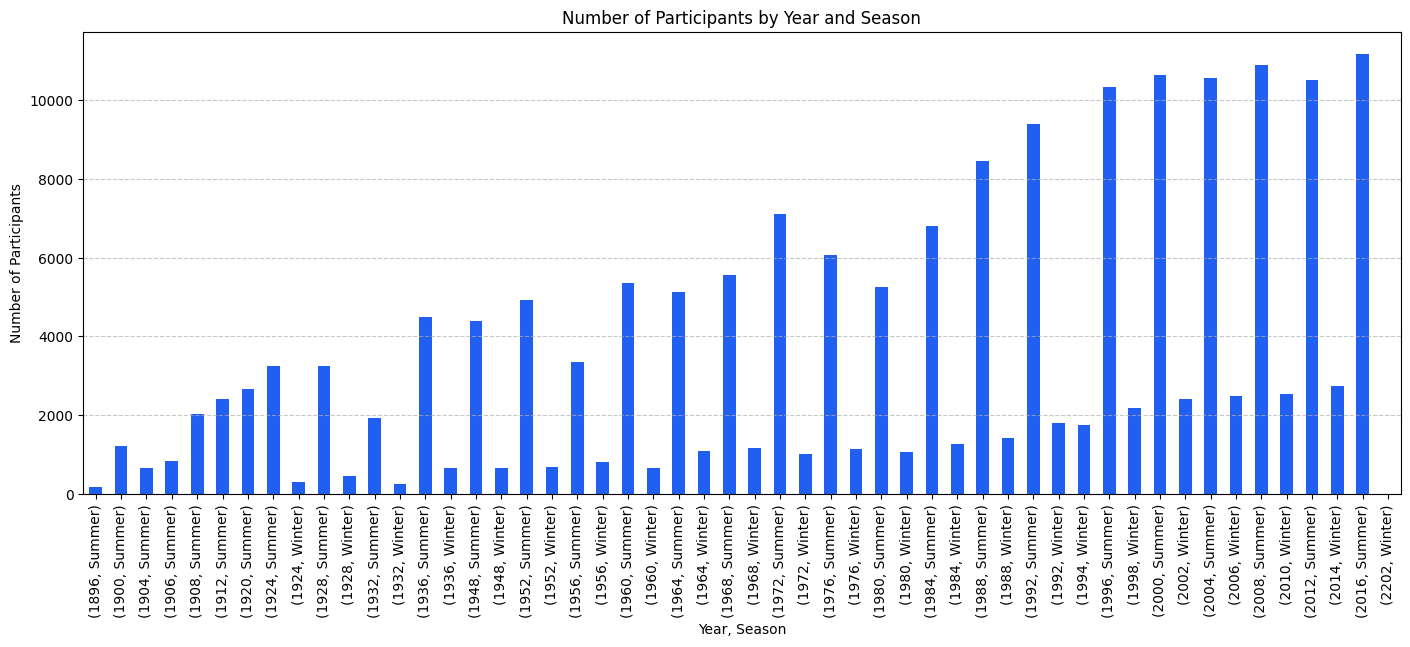

In [ ]:
df_with_medals = df.dropna(subset=['Medal'])

yearly_season_participants_counts = df.groupby(['Year', 'Season'])['ID'].nunique()

# Plot the number of participants by year and season
plt.figure(figsize=(17, 6))
yearly_season_participants_counts.plot(kind='bar', color='#205FEF')
plt.xlabel('Year, Season')
plt.ylabel('Number of Participants')
plt.title('Number of Participants by Year and Season')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

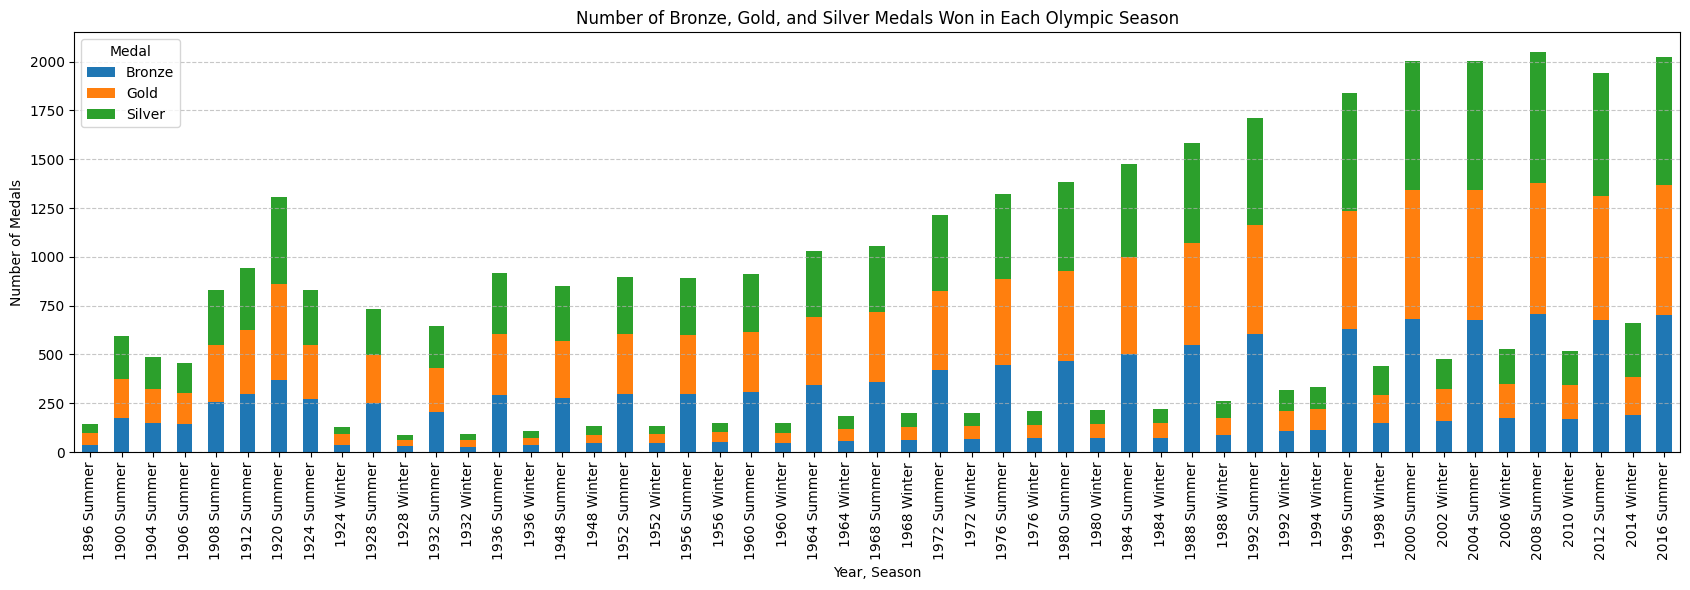

In [ ]:
df_with_medals = df.dropna(subset=['Medal'])
medals_by_season = df_with_medals.groupby(['Games', 'Medal']).size().unstack(fill_value=0)

# Plot the stacked bar chart
medals_by_season.plot(kind='bar', stacked=True, figsize=(17, 6))

plt.xlabel('Year, Season')
plt.ylabel('Number of Medals')
plt.title('Number of Bronze, Gold, and Silver Medals Won in Each Olympic Season')
plt.legend(title='Medal', labels=['Bronze', 'Gold', 'Silver'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# Yearly participants
# Incorrect year
participants_each_year = df.groupby('Games')['ID'].nunique().reset_index()
participants_each_year.tail()

,Games,ID
47,2010 Winter,2536
48,2012 Summer,10517
49,2014 Winter,2745
50,2016 Summer,11179
51,2202 Winter,1


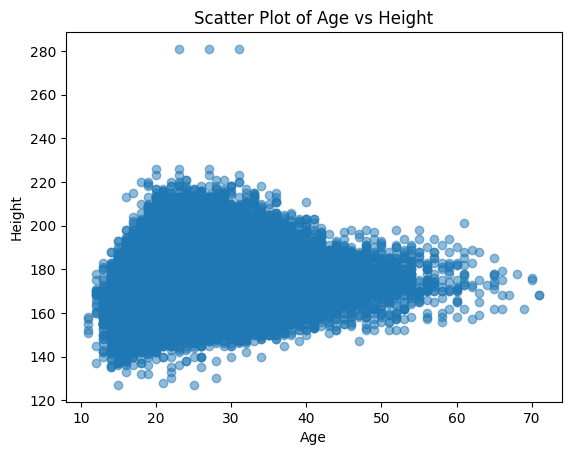

In [ ]:
# Height vs Age correlation
test = df[['ID','Name','Age','Sex','Height','Weight']].drop_duplicates(keep="first")
# test.groupby('ID').first()
test['Height'].describe()

plt.scatter(test['Age'], test['Height'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Scatter Plot of Age vs Height')
plt.show()

In [ ]:
# Missing region names
df2 = pd.read_csv('/content/noc_regions.csv')
df2[df2['region'].isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown
